# Final Model - Revamped from baseline CNN

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

base_dir = ".\\signlang\\signlang" #MUST HAVE SIGNLANG DIR in current directory as this file python file


test_directory = os.path.join(base_dir,"test")


train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_directory = os.path.join(base_dir,"train")
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(150,150), 
                                                    shuffle=True, batch_size=20, class_mode='categorical')


val_directory = os.path.join(base_dir,"val")
val_generator = test_datagen.flow_from_directory(val_directory, target_size=(150,150), batch_size=20, 
                                                 shuffle=True, class_mode='categorical')

test_directory = os.path.join(base_dir,"test")
test_generator = test_datagen.flow_from_directory(test_directory, target_size=(150,150), batch_size=20, 
                                                 shuffle=True, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


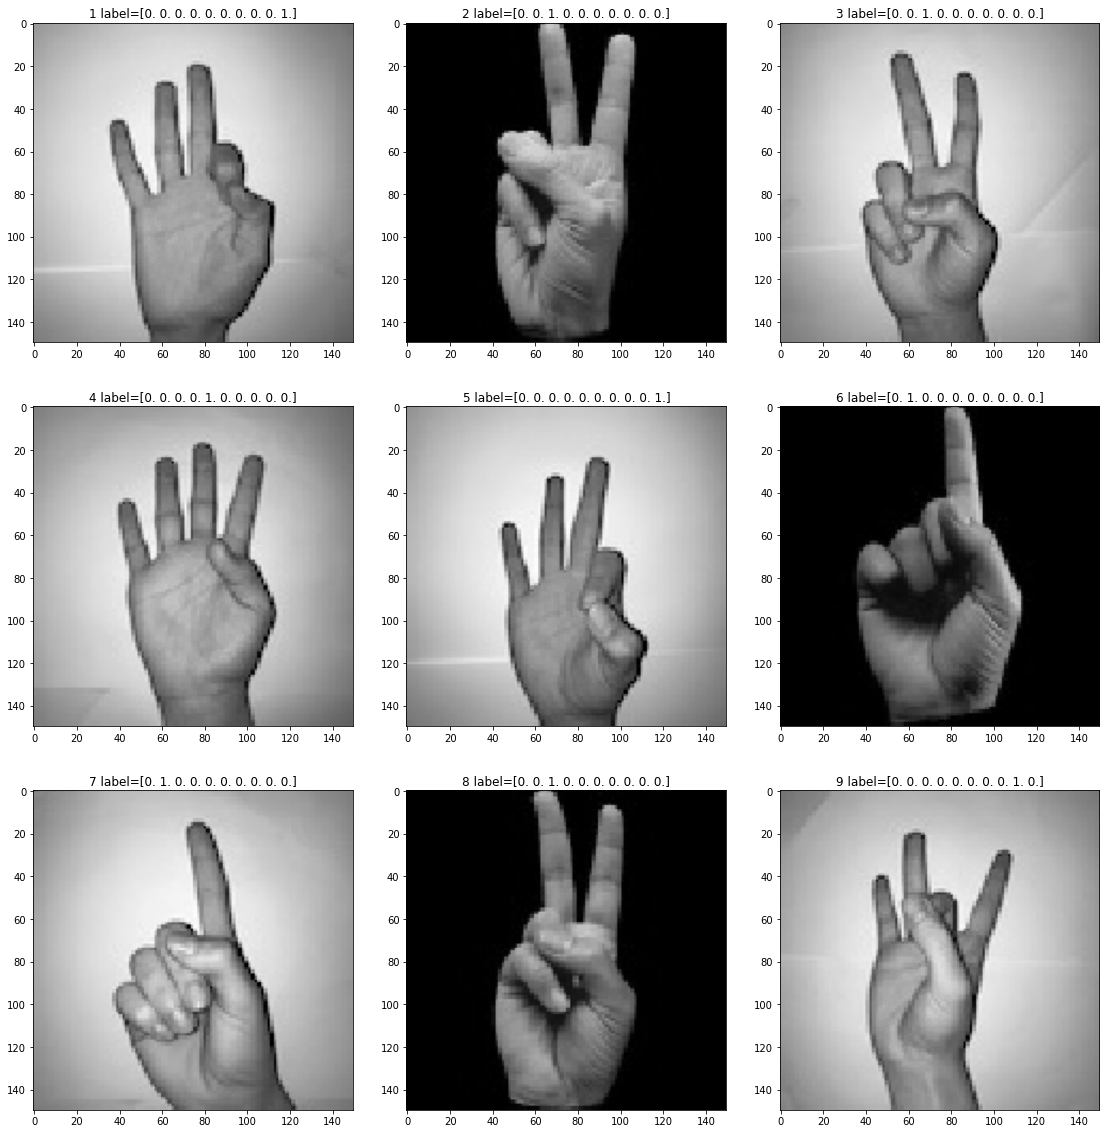

In [2]:
#Displaying randomised batch of images within datasets

import matplotlib.pyplot as plt

for data_batch, label_batch in train_generator:
    break

    
fig=plt.figure(figsize=(20,20))
columns = 3
rows = 3
for i in range (1,10):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=None, wspace = 0.01)
    ax.title.set_text(str(i)+ " label=" +str(label_batch[i]))
    plt.imshow(img)
plt.show()

In [3]:
#Model
from keras import models, layers
from tensorflow.keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

network = models.Sequential()

Pairs = 2
network.add(layers.Conv2D(8, (7, 7), activation="relu", input_shape=(150,150,3)))
network.add(layers.MaxPooling2D(4, 4))

for ApplyingPairs in range(1, Pairs):
    network.add(layers.Conv2D(8*(ApplyingPairs*2), (7,7), activation="relu"))
    network.add(layers.MaxPooling2D(4, 4))

network.add(layers.Flatten())
network.add(keras.layers.Dropout(0.5))
network.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.0001)))
network.add(layers.Dense(10, activation="softmax"))

network.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5) #Ends training after repetetive results.

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 144, 144, 8)       1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        6288      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

C:\Users\uzair\anaconda3\envs\UzairsUniPython\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [4]:
history = network.fit_generator(train_generator, epochs=80, 
                             validation_data=val_generator)


C:\Users\uzair\anaconda3\envs\UzairsUniPython\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
97/97 [==============================] - 20s 205ms/step - loss: 1.9273 - accuracy: 0.3318 - val_loss: 1.0634 - val_accuracy: 0.6588
Epoch 2/80
97/97 [==============================] - 20s 207ms/step - loss: 0.9461 - accuracy: 0.6884 - val_loss: 0.5791 - val_accuracy: 0.8321
Epoch 3/80
97/97 [==============================] - 21s 216ms/step - loss: 0.6176 - accuracy: 0.7968 - val_loss: 0.4052 - val_accuracy: 0.8777
Epoch 4/80
97/97 [==============================] - 21s 215ms/step - loss: 0.4836 - accuracy: 0.8403 - val_loss: 0.3937 - val_accuracy: 0.8832
Epoch 5/80
97/97 [==============================] - 21s 213ms/step - loss: 0.4048 - accuracy: 0.8782 - val_loss: 0.3459 - val_accuracy: 0.8905
Epoch 6/80
97/97 [==============================] - 20s 204ms/step - loss: 0.3595 - accuracy: 0.8953 - val_loss: 0.3274 - val_accuracy: 0.8869
Epoch 7/80
97/97 [==============================] - 20s 202ms/step - loss: 0.3085 - accuracy: 0.9057 - val_loss: 0.2508 - val_accuracy: 0.9288

Epoch 58/80
97/97 [==============================] - 22s 225ms/step - loss: 0.0819 - accuracy: 0.9876 - val_loss: 0.2242 - val_accuracy: 0.9617
Epoch 59/80
97/97 [==============================] - 22s 227ms/step - loss: 0.0753 - accuracy: 0.9896 - val_loss: 0.2357 - val_accuracy: 0.9653
Epoch 60/80
97/97 [==============================] - 22s 228ms/step - loss: 0.0714 - accuracy: 0.9912 - val_loss: 0.2340 - val_accuracy: 0.9562
Epoch 61/80
97/97 [==============================] - 22s 223ms/step - loss: 0.0751 - accuracy: 0.9886 - val_loss: 0.2502 - val_accuracy: 0.9562
Epoch 62/80
97/97 [==============================] - 21s 219ms/step - loss: 0.0820 - accuracy: 0.9876 - val_loss: 0.2502 - val_accuracy: 0.9617
Epoch 63/80
97/97 [==============================] - 21s 216ms/step - loss: 0.0882 - accuracy: 0.9860 - val_loss: 0.2126 - val_accuracy: 0.9708
Epoch 64/80
97/97 [==============================] - 21s 219ms/step - loss: 0.0697 - accuracy: 0.9927 - val_loss: 0.2436 - val_accuracy:

In [5]:
#SAVING AND LOADING history of fitting the model.
import pickle
dictionary_data = history.history
history_file = open("ASL_History_Data", "wb")
pickle.dump(dictionary_data, history_file)
history_file.close()


In [6]:
import pickle
history_file = open("ASL_History_Data", "rb")
history = pickle.load(history_file)
history_file.close()

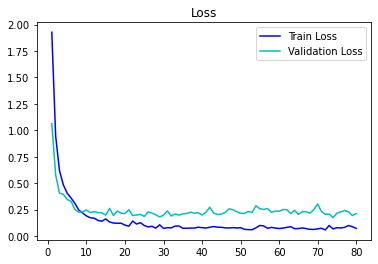

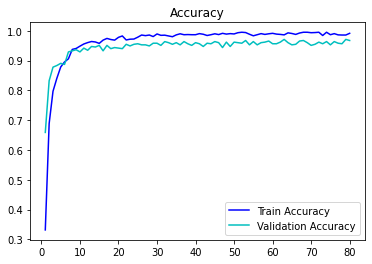

In [7]:
#Displaying results onto metaplot graph
Training_history_info = [history["loss"], history["accuracy"]]
Validation_history_info = [history["val_loss"], history["val_accuracy"]]

epochs = range(1,len(Training_history_info[0])+1)

plt.plot(epochs,Training_history_info[0],'b', label='Train Loss')
plt.plot(epochs,Validation_history_info[0], 'c', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.figure()


plt.plot(epochs,Training_history_info[1],'b', label='Train Accuracy')
plt.plot(epochs,Validation_history_info[1], 'c', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [8]:
test_loss, test_accuracy = network.evaluate(test_generator, verbose=2)
print ("Overall accuracy: {0}".format(test_accuracy))

15/15 - 1s - loss: 0.1014 - accuracy: 0.9861
Overall accuracy: 0.9860627055168152
